Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanngan.

Kamu diminta unutk membandingkna nilai "bintang" dari customer setalah dia order

macet = [2, 3, 5, 4, 4, 2, 2, 2] tidak macet = [ 4 , 3, 5, 4 , 4, 5,5]

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [16]:
macet = [2, 3, 5, 4, 4, 2, 2, 2]

In [17]:
tidakmacet = [ 4 , 3, 5, 4 , 4, 5,5,5]

Uji Normalitas

Ho = Data berdistribusi normal

Ha = data tidak berdistribusi normal

/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

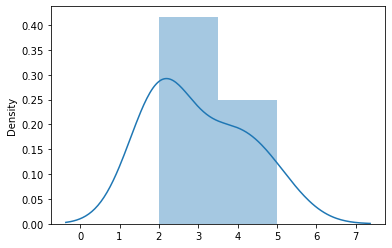

In [18]:
sns.distplot(macet)

/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

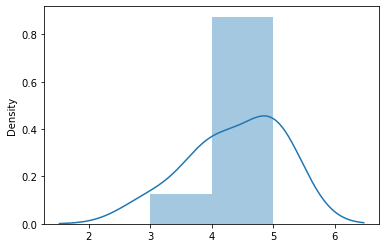

In [19]:
sns.distplot(tidakmacet)

In [20]:
#UJI KOLMOGORV-SMIRNOV -> MENENTUKAN APAKAH DATA INI BERDISTRIBUSI NORMAL ATAU TIDAK

z_score_macet = stats.zscore(macet)
z_score_tidakmacet = stats.zscore(tidakmacet)

In [21]:
print("Stats of data macet ", stats.kstest(z_score_macet, "norm"))
print("Stats of data tidakmacet ", stats.kstest(z_score_tidakmacet, "norm"))

Stats of data macet  KstestResult(statistic=0.3144533152386512, pvalue=0.3346106710695924)
Stats of data tidakmacet  KstestResult(statistic=0.3154142918336542, pvalue=0.3311083178190486)


Jika p-value > 0.05, maka Ho Diterima, data berdistribusi normal

jika maka sebaliknya

In [22]:
len(tidakmacet)

8

In [23]:
t_value = stats.ttest_rel(tidakmacet,macet)

print('Hasil uji t : ', t_value)

Hasil uji t :  Ttest_relResult(statistic=2.5824971129863203, pvalue=0.036339839119456076)


Uji Wilcoxon (non paramterik)
Misalkan datatanya tidak berdistribusi normal, uji beda 2 kelompok berhubungan dapata dilakukan dengan uji wilcoxon

In [25]:
d = tidakmacet - macet
stats.wilcoxon(d)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Uji Beda lebih dari kelompok
Dalam statistik paramterik (ANOVA), memiliki 2 asumsi:

Data berdistribusi normla
Varians data homogen

Kasus

Misalkan saat ini kamu adalah mentri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara sudah merata atau belum.

Daerah dibagi menjadi

kota besar di wilayah barat
kota kecil di wilayah barat
ibukota
kota besar di wilayah timur
kota kecil di wilayah timur

In [27]:
final_exam = pd.read_csv('final_exam.csv')
final_exam

,big_west,small_west,capital_city,big_east,small_east
0,87,77,86,71,70
1,75,83,90,82,76
2,80,73,87,85,81
3,75,82,85,89,85
4,91,71,85,72,75
5,89,87,96,79,75
6,91,77,95,79,75
7,87,84,89,85,72
8,90,86,93,84,72
9,94,93,91,86,75


<Figure size 1280x960 with 0 Axes>

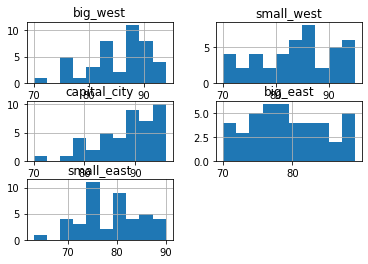

In [28]:
#membuat histogram
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
final_exam.hist()
plt.show()

In [29]:
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']

for a in area:
  z_score = stats.zscore(final_exam[a])
  stat = stats.kstest(z_score, "norm")
  print('stat ', a, ' = ', stat)

stat  big_west  =  KstestResult(statistic=0.1463623852887705, pvalue=0.28678269325815053)
stat  small_west  =  KstestResult(statistic=0.09305748870693209, pvalue=0.8171989638137918)
stat  capital_city  =  KstestResult(statistic=0.1723544820281414, pvalue=0.1379003575286657)
stat  small_east  =  KstestResult(statistic=0.11522951440351409, pvalue=0.5778423663395744)
stat  big_east  =  KstestResult(statistic=0.09709346617838455, pvalue=0.7763472906058266)


In [30]:
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

LeveneResult(statistic=0.5104303607286809, pvalue=0.728125042716542)

Uji ANOVA
Ho = Kualias pendidiakn merata

ha = kualitas pendidikan tidak merata

In [31]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

In [32]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


In [33]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)